In [ ]:
from google.colab import drive
import zipfile

print("📂 Mounting Google Drive...")
drive.mount('/content/drive')

zip_path = "/content/drive/MyDrive/archive.zip"
extract_path = "/content/drive/MyDrive/extracted_folder"

print("🗃️ Extracting dataset...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset Extracted Successfully!")


📂 Mounting Google Drive...
Mounted at /content/drive
🗃️ Extracting dataset...


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions




In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True, preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)

In [ ]:
train = train_datagen.flow_from_directory(directory='/content/drive/MyDrive/extracted_folder/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
                                          target_size=(256,256),
                                          batch_size=32)

val = test_datagen.flow_from_directory(directory='/content/drive/MyDrive/extracted_folder/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                          target_size=(256,256),
                                          batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
t_img, label = next(train)


In [ ]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

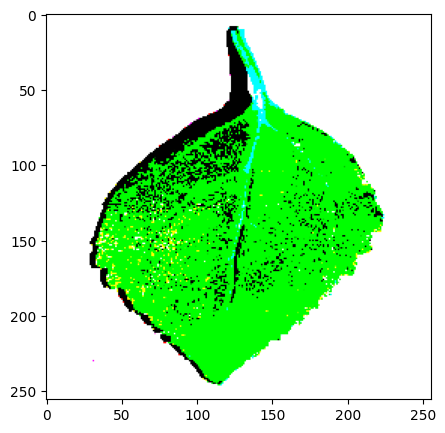

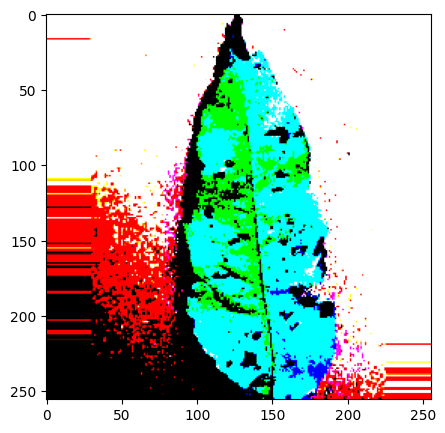

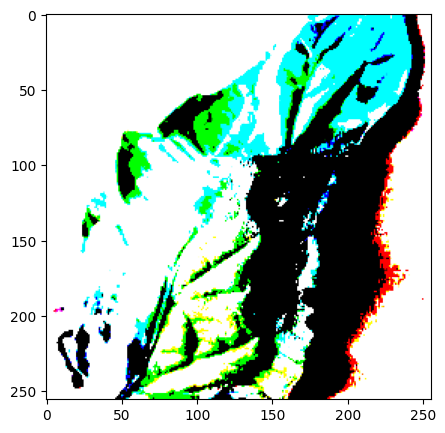

In [ ]:
plotImage(t_img[:3], label[:3])

In [ ]:
# 3. Model Building using VGG19
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(256,256,3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=38, activation='softmax')(x)
model = Model(base_model.input, x)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False


In [ ]:
base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
x= Flatten()(base_model.output)

x= Dense(units=38, activation='softmax')(x)

model= Model(base_model.input, x)

In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │     1,245,222 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,269,606 (81.14 MB)

 Trainable params: 1,245,222 (4.75 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# EarlyStopping — supports min_delta
es = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.01,
    patience=3,
    verbose=1,
    restore_best_weights=True
)

# ✅ FIXED: Removed `min_delta` from ModelCheckpoint
mc = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.3,
    patience=2,
    verbose=1,
    min_lr=1e-6
)

cb = [es, mc, lr]


In [ ]:
his = model.fit(
    train,
    steps_per_epoch=16,
    epochs=50,
    verbose=1,
    callbacks= cb,
    validation_data=val,
    validation_steps=16
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 735ms/step - accuracy: 0.1166 - loss: 27.5592
Epoch 1: val_accuracy improved from -inf to 0.40234, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.1206 - loss: 27.5224 - val_accuracy: 0.4023 - val_loss: 15.7319 - learning_rate: 0.0010
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 758ms/step - accuracy: 0.3724 - loss: 18.0835
Epoch 2: val_accuracy improved from 0.40234 to 0.60938, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3755 - loss: 17.9192 - val_accuracy: 0.6094 - val_loss: 9.7636 - learning_rate: 0.0010
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.5583 - loss: 11.4465
Epoch 3: val_accuracy improved from 0.60938 to 0.71094, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5573 - loss: 11.4230 - val_accuracy: 0.7109 - val_loss: 5.9003 - learning_rate: 0.0010
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 587ms/step - accuracy: 0.5953 - loss: 10.0239
Epoch 4: val_accuracy did not improve from 0.71094
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5957 - loss: 10.0283 - val_accuracy: 0.6152 - val_loss: 9.8868 - learning_rate: 0.0010
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.6049 - loss: 9.0148
Epoch 5: val_accuracy did not improve from 0.71094

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6063 - loss: 8.9778 - val_accuracy: 0.6895 - val_loss: 9.0024 - learning_rate: 0.0010
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.6234 - loss: 10.1924
Epoch 6: val_accuracy improved from 0.71094 to 0.75781, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 875ms/step - accuracy: 0.6247 - loss: 10.0920 - val_accuracy: 0.7578 - val_loss: 5.1155 - learning_rate: 3.0000e-04
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 665ms/step - accuracy: 0.6693 - loss: 6.2445
Epoch 7: val_accuracy improved from 0.75781 to 0.79883, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6691 - loss: 6.2510 - val_accuracy: 0.7988 - val_loss: 4.2136 - learning_rate: 3.0000e-04
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.7208 - loss: 5.4871
Epoch 8: val_accuracy improved from 0.79883 to 0.82031, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7223 - loss: 5.4728 - val_accuracy: 0.8203 - val_loss: 4.1645 - learning_rate: 3.0000e-04
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.7721 - loss: 4.6623
Epoch 9: val_accuracy did not improve from 0.82031
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 779ms/step - accuracy: 0.7722 - loss: 4.6511 - val_accuracy: 0.7871 - val_loss: 4.6632 - learning_rate: 3.0000e-04
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.7542 - loss: 4.5172
Epoch 10: val_accuracy did not improve from 0.82031

Epoch 10: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7540 - loss: 4.5167 - val_accuracy: 0.7812 - val_loss: 3.9389 - learning_rate: 3.0000e-04
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.7542 - loss: 5.0617
Epoch 11: val_accuracy did not improve from 0.82031
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7552 - loss: 5.0186 - 

📊 History keys: ['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate']


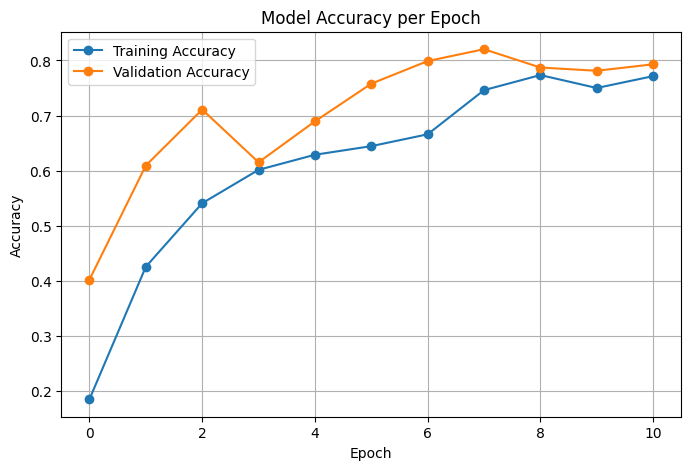

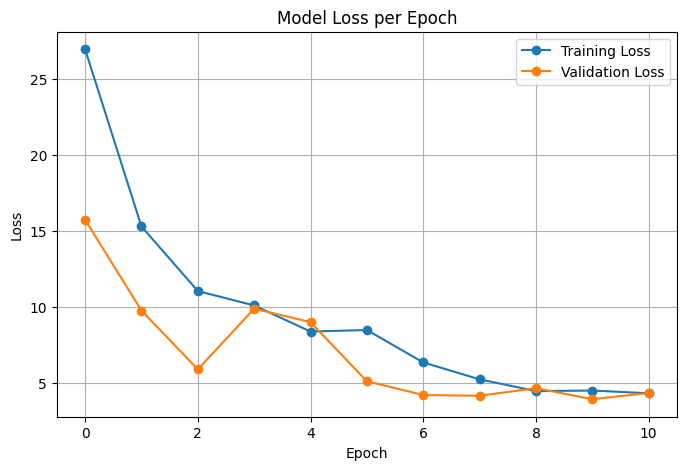

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have the training history object as `his`
h = his.history

# Print the available keys in the history
print("📊 History keys:", list(h.keys()))

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(h['accuracy'], label='Training Accuracy', marker='o')
plt.plot(h['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(h['loss'], label='Training Loss', marker='o')
plt.plot(h['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from keras.models import load_model

model.save('/content/drive/MyDrive/florascan_modelvgg19.h5')
print("Model saved successfully!")


Model saved successfully!


In [ ]:
import tensorflow as tf

# Step 1: Load the saved model from Google Drive
model_path = '/content/drive/MyDrive/florascan_modelvgg19.h5'
model = tf.keras.models.load_model(model_path)
print("✅ Loaded .h5 model successfully!")

# Step 2: Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Optional: Enable optimization (smaller size, faster inference)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()
print("✅ Converted to .tflite format!")

# Step 3: Save the TFLite model
tflite_model_path = '/content/drive/MyDrive/florascan_modelvgg19.tflite'
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)
print(f"✅ Saved as {tflite_model_path}")


✅ Loaded .h5 model successfully!
Saved artifact at '/tmp/tmpexxe8_1s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 38), dtype=tf.float32, name=None)
Captures:
  132623106333136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132623106336592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132623106334480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132623106337360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132623106336784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132623106338128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132623106337552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132623106338896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132623106338320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132623106339664: TensorSpec(shape=(), dtype=tf.re

In [ ]:
loss, acc = model.evaluate(val, verbose=1)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {acc * 100:.2f} %")


550/550 ━━━━━━━━━━━━━━━━━━━━ 157s 282ms/step - accuracy: 0.7837 - loss: 4.4967
Validation Loss: 4.5529
Validation Accuracy: 78.15 %


In [ ]:
# Assuming train.class_indices is already defined
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

# Printing each key-value pair one after another
for key, value in ref.items():
    print(f"{key}: {value}")


0: Apple___Apple_scab
1: Apple___Black_rot
2: Apple___Cedar_apple_rust
3: Apple___healthy
4: Blueberry___healthy
5: Cherry_(including_sour)___Powdery_mildew
6: Cherry_(including_sour)___healthy
7: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
8: Corn_(maize)___Common_rust_
9: Corn_(maize)___Northern_Leaf_Blight
10: Corn_(maize)___healthy
11: Grape___Black_rot
12: Grape___Esca_(Black_Measles)
13: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
14: Grape___healthy
15: Orange___Haunglongbing_(Citrus_greening)
16: Peach___Bacterial_spot
17: Peach___healthy
18: Pepper,_bell___Bacterial_spot
19: Pepper,_bell___healthy
20: Potato___Early_blight
21: Potato___Late_blight
22: Potato___healthy
23: Raspberry___healthy
24: Soybean___healthy
25: Squash___Powdery_mildew
26: Strawberry___Leaf_scorch
27: Strawberry___healthy
28: Tomato___Bacterial_spot
29: Tomato___Early_blight
30: Tomato___Late_blight
31: Tomato___Leaf_Mold
32: Tomato___Septoria_leaf_spot
33: Tomato___Spider_mites Two-spotted_spider_m

In [ ]:
# Assuming train.class_indices is already defined
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

# Printing only the class names (values) from the dictionary
print(list(ref.values()))


['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
def predection (path):
  img = load_img(path, target_size=(256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis=0)
  pred = np.argmax(model.predict(img))

  print(f"The image belongs to { ref[pred] }")



In [ ]:
path = "/content/drive/MyDrive/extracted_folder/test/test/TomatoHealthy3.JPG"
predection(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The image belongs to Tomato___healthy
